### Исследование модификаций Стохастического градиентного спуска

In [37]:
from utils import *

plt.rcParams["figure.figsize"] = (20,10)

In [38]:
def sgd_general(batch_size, f, x, *, lr0, d, epoch):
    points = np.zeros((epoch, len(x)))
    points[0] = x
    for i in range(1, epoch):
        x = x - lr0*np.exp(-d*i) * np.array(grad_batch(f, batch_size)(*x))
        points[i] = x
    return points

#### Реализации разных модификаций

In [39]:
def sgd_momentum(batch_size, f, x, *, lr0, epoch, alpha):
    points = np.zeros((epoch, len(x)))
    points[0] = x
    dx = 0
    for i in range(1, epoch):
        dx = alpha * dx - lr0 * np.array(grad_batch(f, batch_size)(*x))
        x = x + dx
        points[i] = x
    return points

In [40]:
def sgd_ada_grad(batch_size, f, x, *, lr0, epoch):
    points = np.zeros((epoch, 2))
    points[0] = x
    s = 0
    for i in range(1, epoch):
        g = np.array(grad_batch(f, batch_size)(*x))
        s += g**2
        x = x - lr0 * (g / np.sqrt(s))
        points[i] = x
    return points

In [41]:
def sgd_rms_prop(batch_size, f, x, *, lr0, epoch, alpha):
    points = np.zeros((epoch, 2))
    points[0] = x
    v = 0
    for i in range(1, epoch):
        g = np.array(grad_batch(f, batch_size)(*x))
        v = alpha * v + (1 - alpha) * g**2
        x = x - lr0 / np.sqrt(v)*g
        points[i] = x
    return points

In [42]:
def sgd_adam(batch_size, f, x, *, lr0, epoch, alpha, beta):
    points = np.zeros((epoch, 2))
    points[0] = x
    m = 0
    v = 0
    for i in range(1, epoch):
        g = np.array(grad_batch(f, batch_size)(*x))
        m = alpha * m + (1-alpha)*g
        v = beta * v + (1 - beta) * g**2

        m_ = m/(1-alpha)
        v_ = v/(1-beta)

        x = x - lr0*m_/(np.sqrt(v_) + 1e-5)
        points[i] = x
    return points

In [54]:
line = test_line(2, 20, 100, 20, 1)

came close by 32.31658543702385
came close by 299.3572728541954
came close by 25.10918082599377
came close by 13.607087356214052
came close by 95.09590391237288


array([ 7.52762798, -2.45137128])

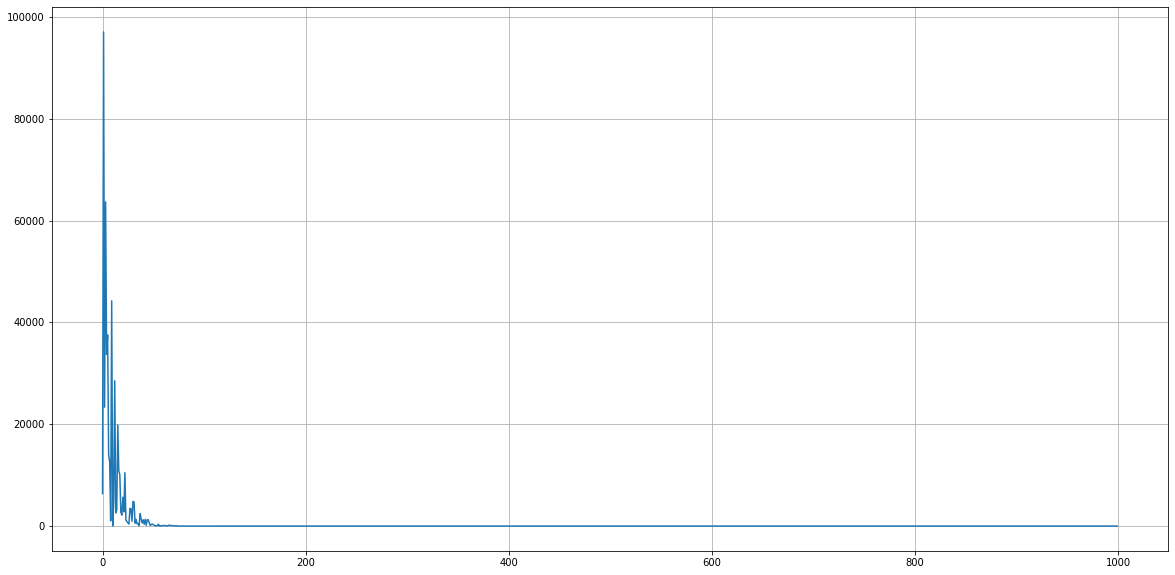

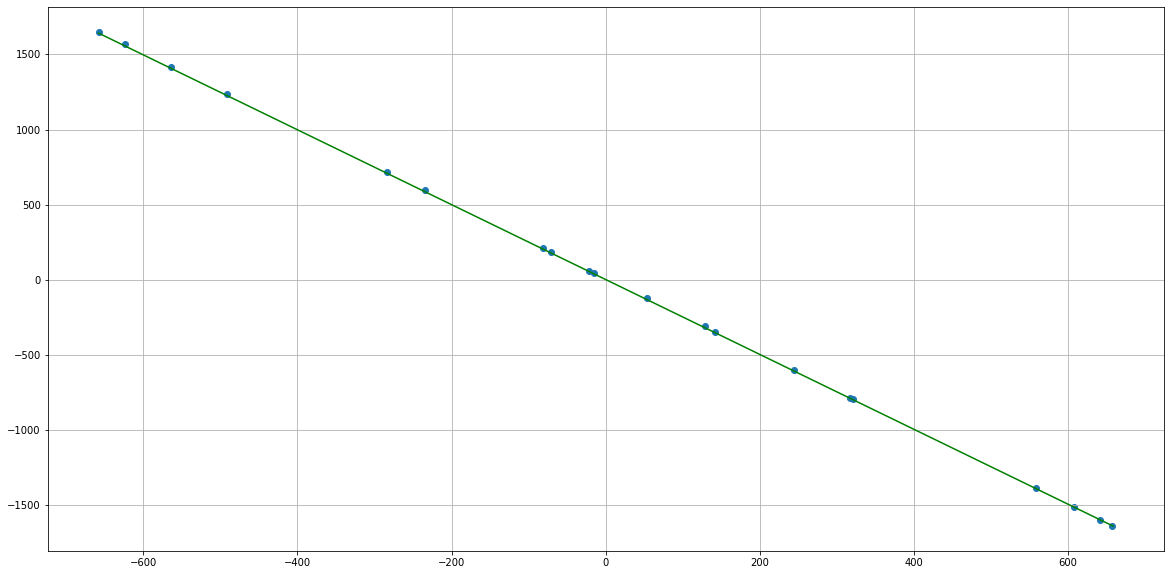

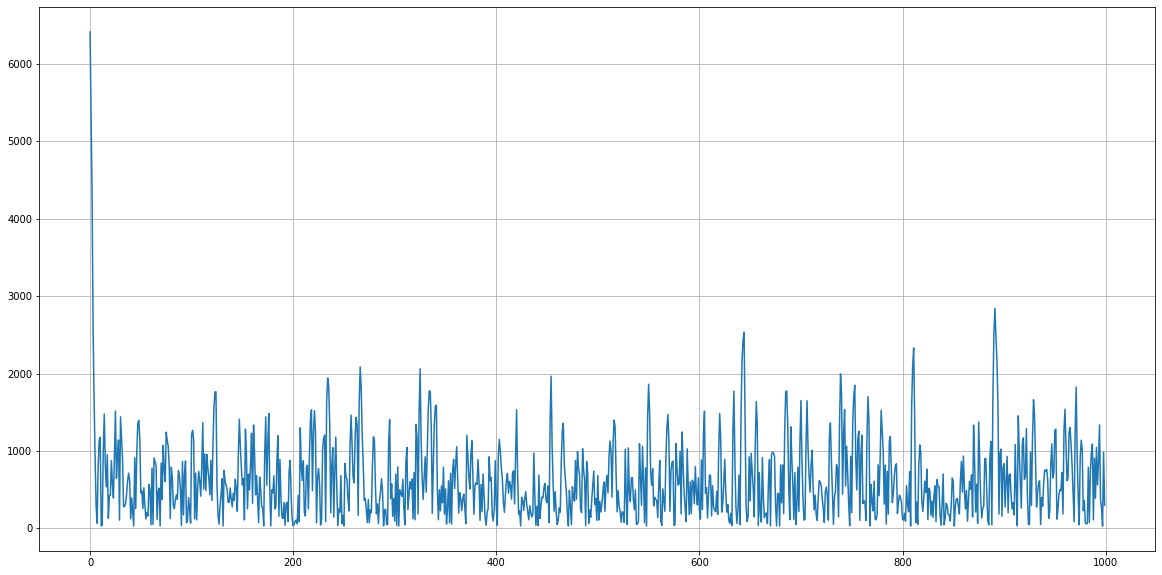

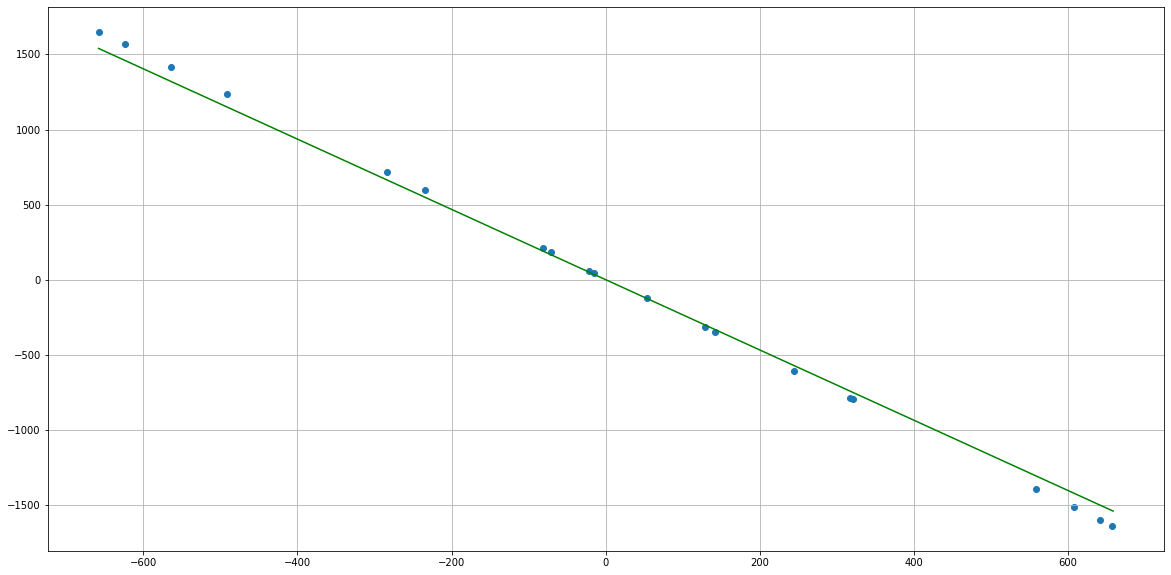

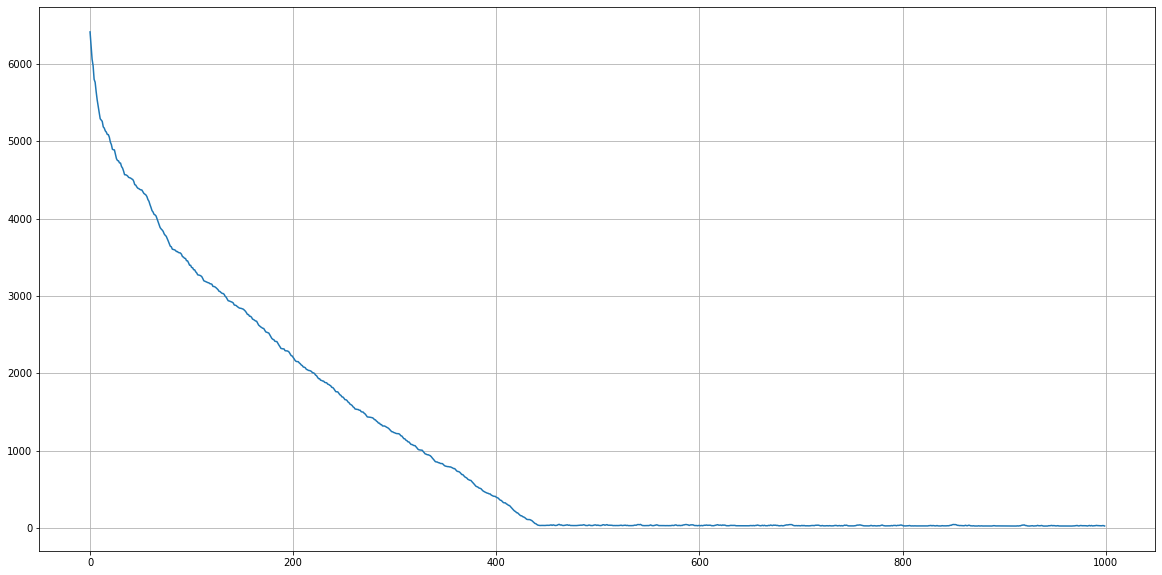

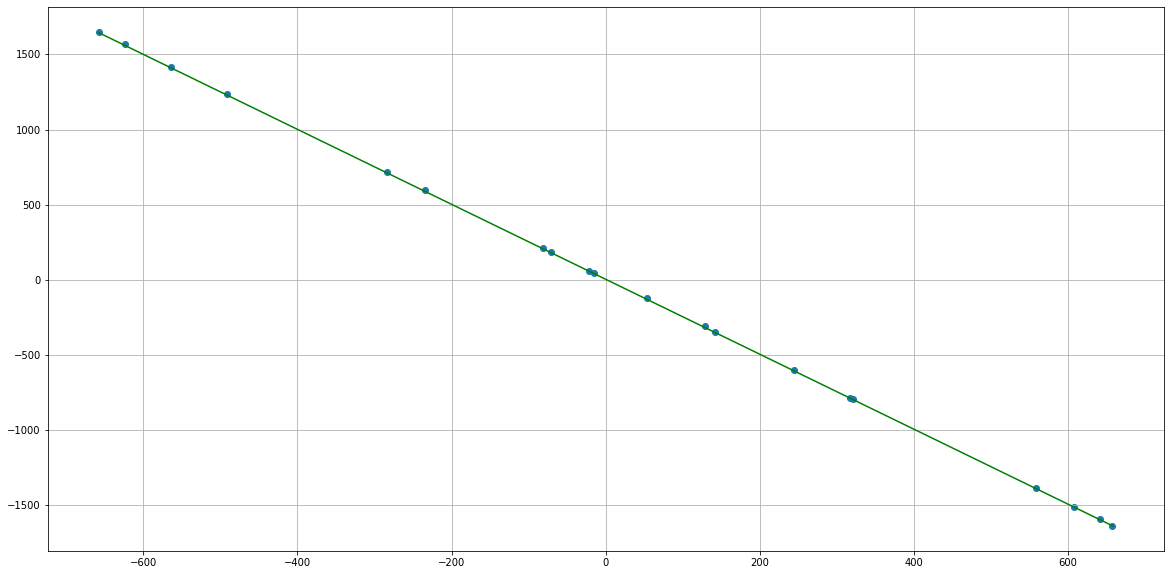

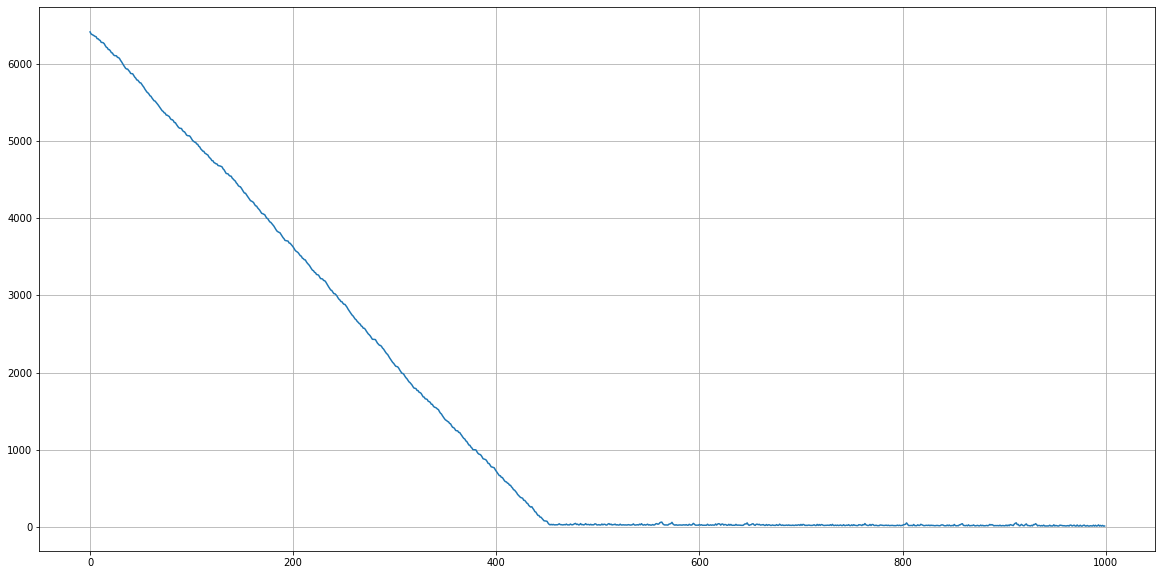

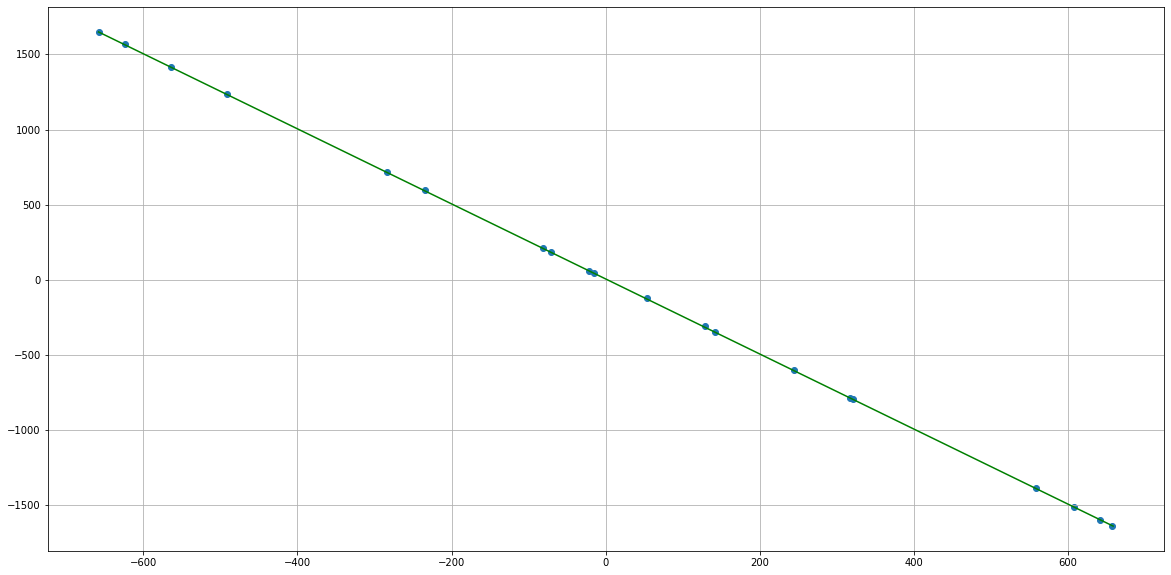

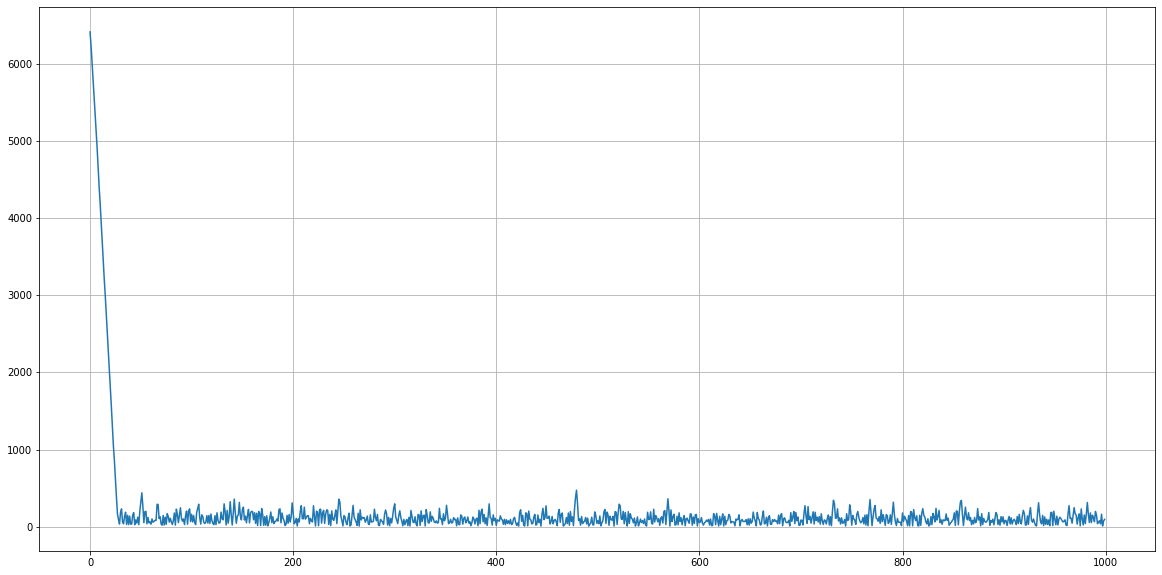

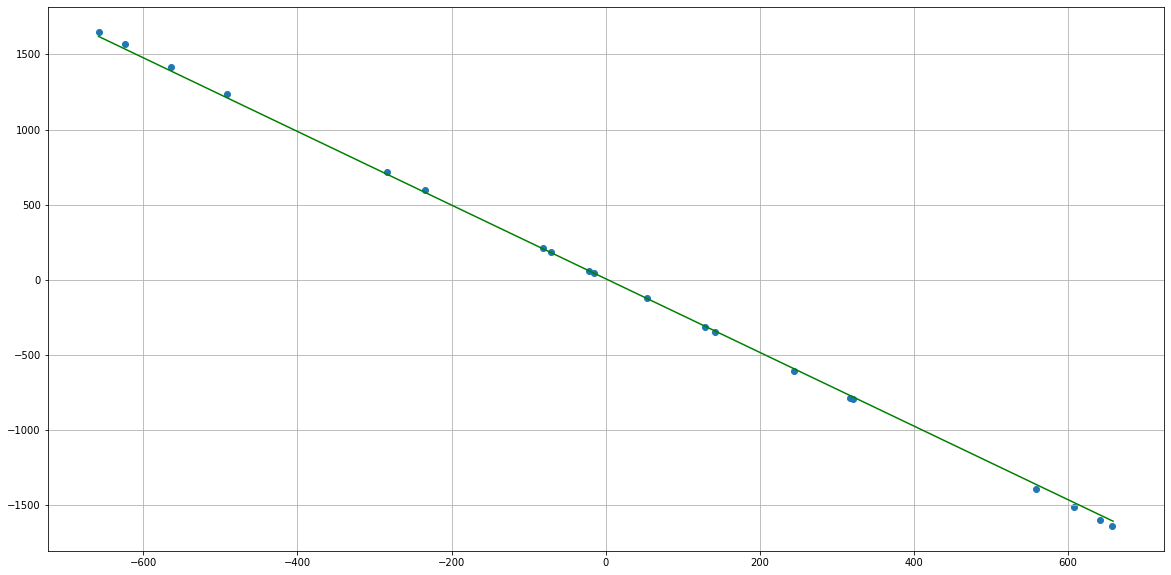

In [75]:
regression(*line, lr0=0.1, d=0.1, epoch=1000)
regression(*line, method=sgd_momentum, lr0=0.001, epoch=1000, alpha=0.5)
regression(*line, method=sgd_ada_grad, lr0=0.1, epoch=1000)
regression(*line, method=sgd_rms_prop, lr0=0.01, epoch=1000, alpha=0.5)
regression(*line, method=sgd_adam, lr0=0.1, epoch=1000, alpha=0.35, beta=0.2)